# [NTDS'18] tutorial 3: Plotting with Matplotlib
[ntds'18]: https://github.com/mdeff/ntds_2018
adapted from [ntds'17 matplotlib demo](https://github.com/mdeff/ntds_2017/blob/master/demos/05_matplotlib.ipynb)

[Eda Bayram](http://lts4.epfl.ch/bayram), [EPFL LTS4](http://lts4.epfl.ch)

## Ojective
In this lab session we will provide a short tutorial to ``Matplotlib``. We will present:

1) The ``matplotlib.pyplot`` module that provides a procedural interface similar to that of Matlab

2) The Object Oriented API of Matplotlib, which allows for maximum flexibility 

## 1. The Pyplot API

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Example 1.1: Plot a linear function

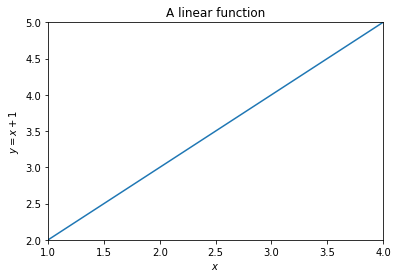

In [2]:
x = np.array([1,2,3,4])
y = x + 1
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$y=x+1$')
plt.axis([x.min(), x.max(), y.min(), y.max()]);
plt.title('A linear function');
plt.show()

As you have used before, you may activate inline backend, i.e.,**``%matplotlib inline``**, instead of running the last line, i.e., **``plt.show()``**, to visualize the figure.

### Example 1.2: Figure and axis properties

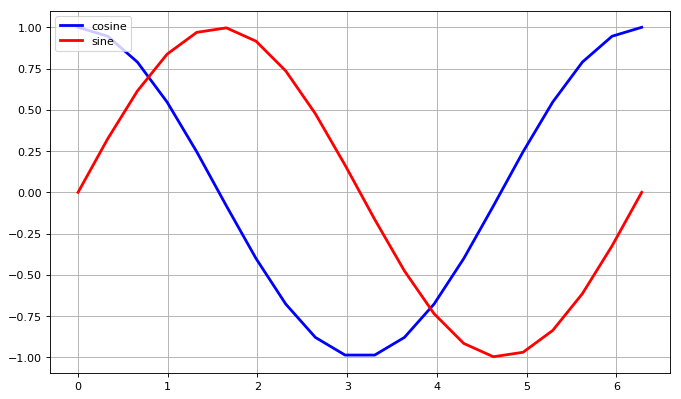

In [3]:
x= np.linspace(0, 2*np.pi, 20)
y = np.cos(x);
z = np.sin(x)
#initiate the figure settings
plt.figure(figsize=(10, 6), dpi=80) 
plt.plot(x, y, color="blue", linewidth=2.5, linestyle="-", label="cosine");
plt.plot(x, z, color="red",  linewidth=2.5, linestyle="-", label="sine");
plt.legend(loc='upper left');
plt.grid();
plt.show()

### Example 1.3: Subplots

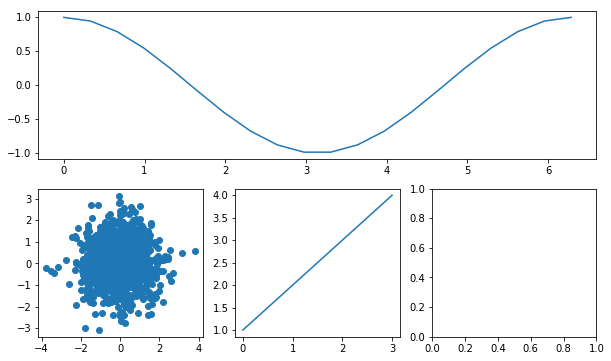

In [4]:
# Divide the frame (2x3)
plt.figure(figsize=(10, 6))
plt.subplot(211);
plt.plot(x,y)
plt.subplot(234);
plt.scatter(np.random.normal(0,1,1024),np.random.normal(0,1,1024))
plt.subplot(235);
plt.plot([1,2,3,4])
plt.subplot(236);

plt.show()

### Example 1.4: Plot the sparsity pattern of a 2-D array.

Create and plot an adjacency matrix for a graph with 30 nodes.

In [5]:
N = 30 # number of nodes
W = np.random.uniform(size=(N, N))  # Fully connected graph.
W[W < 0.8] = 0  # Sparse graph.
W = W + W.T  # Symmetric graph.
np.fill_diagonal(W, 0)  # No self-loops.

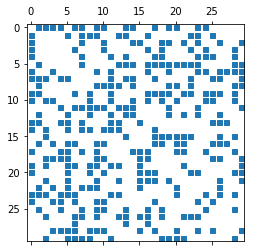

In [6]:
# Visualize the sparsity pattern
plt.spy(W,markersize=5);
plt.show()

Visualization of the weight matrix as an image

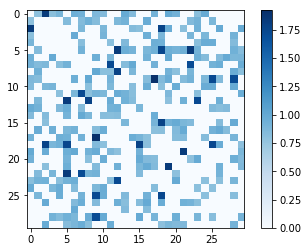

In [7]:
plt.imshow(W, cmap=plt.cm.Blues);
plt.colorbar();
plt.show()

### Example 1.5: Plot a histogram

Let us plot the degree distribution of the graph we created.

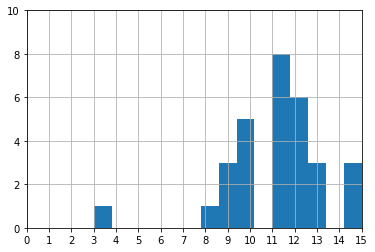

In [8]:
d = (W > 0).sum(axis=0)
plt.hist(d, bins= d.max());
plt.xticks()
plt.axis([0,d.max(),0,10])
plt.xticks(np.arange(d.max()+1))
plt.grid()
plt.show()

### What else can you plot with Pyplot?
You can find a full list of all the functions provided by ``Pyplot`` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

So far we have created simple plots, like the ones you had to create for your first two assignments, using the ``Pyplot`` API. ``Pyplot`` provides a procedural interface similar to the one that you might have been used to from Matlab. However, the Object Oriented API of ``Matplotlib`` offers greater control and customization of the plots and therefore it is recommended to new ``Matplotlib`` users to learn how to use it. 

## 2. The Object Oriented API

Let's have a closer look at what happened when we called the ``pyplot.plot()`` before. Actually, two things happened in the background:

1) We created a figure instance describing the plot window and all of its properties.

2) We added an axes element within the figure. The axes element allows for the data to be arranged in x and y coordinates and provides a wide range of functions.

The ``Figure`` will be the final "picture". A ``Figure`` may contain one or more plots. The ``Axes`` represents each individual plot.The axes class will be your "best friend" for creating plots with the OO API and you can find out more about it [here](https://matplotlib.org/api/axes_api.html).

In order to fully understand ``Matplotlib`` you should have a look at [this tutorial](https://matplotlib.org/users/artists.html).

### Example 2.1: Use Pyplot only to create the figure and show calls

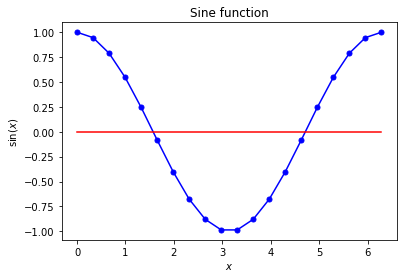

In [9]:
import matplotlib as mpl

ax = plt.subplot(111)
ax.plot(x,y,'.-', markersize=10,color='b')
# Let us add a line indicating 
ax.add_line(mpl.lines.Line2D(x,np.zeros(x.shape),color='r'));
ax.set_title('Sine function')
ax.set_xlabel('$x$')
ax.set_ylabel('$\sin(x)$')
plt.show()

In [10]:
print(type(ax))
# see all the attributes and operations defined for ax object
dir(ax)

<class 'matplotlib.axes._subplots.AxesSubplot'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mo

In [11]:
ax.figure.savefig('sine.pdf')

Open the file `sine.pdf` to see the plot that you saved.

In [12]:
import IPython.display as ipd
ipd.IFrame('sine.pdf', width=600, height=300) 

### Example 2.2: Interactive Plotting

In [13]:
#activate the nbagg backend, which enables interactivity within the Jupyter Notebook
%matplotlib nbagg

The IPython kernel uses the `%` syntax element for magics. You can further read the [matplotlib magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib).

#### A: Create a figure using pyplot and create an axes instance on the figure with ``gca``

<IPython.core.display.Javascript object>


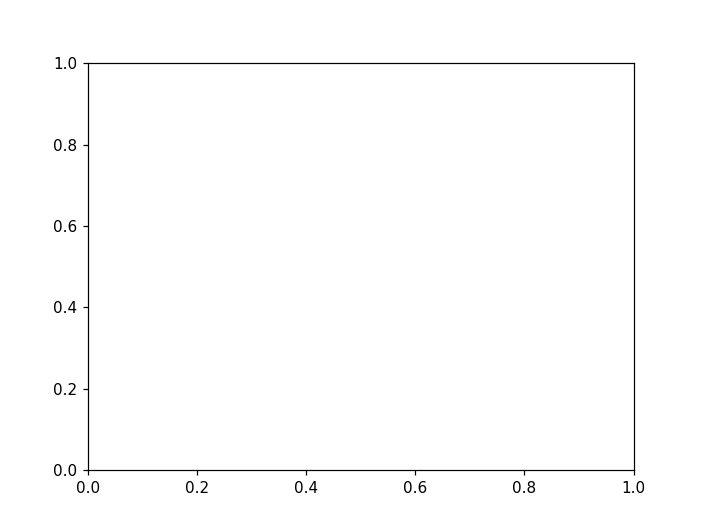

<class 'matplotlib.backends.backend_nbagg.FigureCanvasNbAgg'>


In [14]:
fig1 = plt.figure()
# Get the current axes instance on the current figure
ax1 = fig1.gca()
print(type(fig1.canvas))

#### B: Create a figure using pyplot and add an axes instance on the figure with ``add_subplot``

<IPython.core.display.Javascript object>


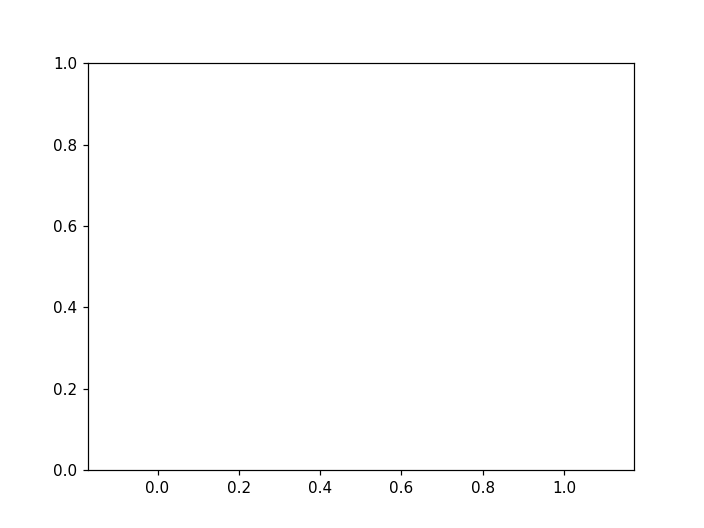

<class 'matplotlib.backends.backend_nbagg.FigureCanvasNbAgg'>


In [15]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
print(type(fig2.canvas))

Now that you have created your figures you can plot on them using the ``Axes`` class. Here, as an example, we will plot a scatter plot in ``fig1`` and a cool optical illusion created by [Jake VanderPlas](https://staff.washington.edu/jakevdp/) (the author of the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook )) in ``fig2``. If you are interested you can find more optical illusions created with ``Matplotlib`` by Jake VanderPlas [here](http://nbviewer.jupyter.org/gist/jakevdp/514bcc09637ac71ca1a8fa703c54e5f7).

In [16]:
#scatterplot
a = np.random.randint(1, 100, size=10)
b = np.random.randint(1, 100, size=10)
ax1.scatter(a, b, color ='red', edgecolors='black')
ax1.set_xscale("linear")
ax1.set_yscale("linear") #change to "log" and see what happens
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100);

In [17]:
#optical illusion by Jake VanderPlas
from matplotlib.collections import PatchCollection

squares = [plt.Rectangle((i + 0.2 * (j % 3), j), 1, 1)
           for j in range(10) for i in range(0, 15, 2)]

ax2.add_collection(PatchCollection(squares, color='black'))

ax2.hlines(np.arange(11), 0, 16, color='gray')

ax2.axis('equal')
ax2.axis('off');

With ``axes.clear()`` you will clear the content of the figures ``fig1`` and ``fig2``.

In [18]:
ax1.clear();
ax2.clear();

Now, you can spend some time to create you own plots with `Matplotlib`. Have fun!

In [19]:
#your code here